In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IS403.N22/Project/dataset/TSLA_Stock.csv',usecols=['Date', 'Price'])#, parse_dates=['Date'], index_col='Date')
df

,Date,Price
0,12/01/2017,20.44
1,12/04/2017,20.35
2,12/05/2017,20.25
3,12/06/2017,20.88
4,12/07/2017,20.75
...,...,...
1387,06/08/2023,234.86
1388,06/09/2023,244.40
1389,06/12/2023,249.83
1390,06/13/2023,258.71


In [ ]:
def get_feature_date(df):
  df['Date'] = pd.to_datetime(df['Date'])

  df['day'] = df['Date'].dt.day
  df['month'] = df['Date'].dt.month
  df['year'] = df['Date'].dt.year

  return df

df = get_feature_date(df)
df

,Date,Price,day,month,year
0,2017-12-01,20.44,1,12,2017
1,2017-12-04,20.35,4,12,2017
2,2017-12-05,20.25,5,12,2017
3,2017-12-06,20.88,6,12,2017
4,2017-12-07,20.75,7,12,2017
...,...,...,...,...,...
1387,2023-06-08,234.86,8,6,2023
1388,2023-06-09,244.40,9,6,2023
1389,2023-06-12,249.83,12,6,2023
1390,2023-06-13,258.71,13,6,2023


In [ ]:
X = df.drop(columns=['Date','Price'])
y = df['Price']

In [ ]:
choose = 1

# 7:2:1
if choose == 1:
  train_size = int(0.7 * len(X))
  test_size = int(0.2 * len(X))
  val_size = len(X) - train_size - test_size

  X_train = X[:train_size]
  y_train = y[:train_size]

  X_test = X[train_size:train_size+test_size]
  y_test = y[train_size:train_size+test_size]

  X_val = X[train_size+test_size:]
  y_val = y[train_size+test_size:]

# 5:3:2
elif choose == 2:
  train_size = int(0.5 * len(X))
  test_size = int(0.3 * len(X))
  val_size = len(X) - train_size - test_size

  X_train = X[:train_size]
  y_train = y[:train_size]

  X_test = X[train_size:train_size+test_size]
  y_test = y[train_size:train_size+test_size]

  X_val = X[train_size+test_size:]
  y_val = y[train_size+test_size:]

# 5:3:2
elif choose == 3:
  train_size = int(0.6 * len(X))
  test_size = int(0.2 * len(X))
  val_size = len(X) - train_size - test_size

  X_train = X[:train_size]
  y_train = y[:train_size]

  X_test = X[train_size:train_size+test_size]
  y_test = y[train_size:train_size+test_size]

  X_val = X[train_size+test_size:]
  y_val = y[train_size+test_size:]

print("Train: ", train_size)
print("Test: ", test_size)
print("Val: ", val_size)

Train:  974
Test:  278
Val:  140


In [ ]:
k = 5  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
def mae_rmse_mape(true, predict):
  mae = mean_absolute_error(true, predict)
  rmse = np.sqrt(mean_squared_error(true, predict))
  mape = mean_absolute_percentage_error(true, predict)

  return mae, rmse, mape

In [ ]:
test_pred = knn.predict(X_test)
mae_test, rmse_test, mape_test = mae_rmse_mape(y_test, test_pred)

val_pred = knn.predict(X_val)
mae_val, rmse_val, mape_val = mae_rmse_mape(y_val, val_pred)

print('MAE of Test: ', mae_test)
print('RMSE of Test: ', rmse_test)
print('MAPE of Test: ', mape_test)
print('------------------------')
print('MAE of Validation: ', mae_val)
print('RMSE of Validation: ', rmse_val)
print('MAPE of Validation: ', mape_val)

MAE of Test:  76.8998417266187
RMSE of Test:  97.61692208855575
MAPE of Test:  0.2415461909741858
------------------------
MAE of Validation:  56.69187142857144
RMSE of Validation:  67.3972429149951
MAPE of Validation:  0.36470339592425893


In [ ]:
from datetime import datetime, timedelta

#end_date = datetime(2023, 5, 20)
n_days = 30
last_date = df['Date'].max()
end_date = last_date + timedelta(days=n_days)
date_list = [end_date - timedelta(days=i-1) for i in range(30)]

data = pd.DataFrame({'Date': date_list})
data = data.sort_values(by='Date', ascending=True).reset_index(drop=True)

data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
def predict_FeatureDate(model, data):
  data['Date'] = pd.to_datetime(data['Date'])

  data['day'] = data['Date'].dt.day
  data['month'] = data['Date'].dt.month
  data['year'] = data['Date'].dt.year

  pred_future = model.predict(data.drop(columns='Date'))

  return pred_future

pred_future = predict_FeatureDate(knn, data)
pred_future

array([207.71 , 199.964, 197.204, 199.842, 200.83 , 204.498, 208.75 ,
       213.996, 214.628, 212.132, 212.278, 213.914, 218.168, 223.45 ,
       228.964, 219.702, 219.702, 218.42 , 220.478, 225.55 , 221.538,
       217.416, 210.874, 222.15 , 226.574, 229.044, 233.434, 229.804,
       212.64 , 211.018])

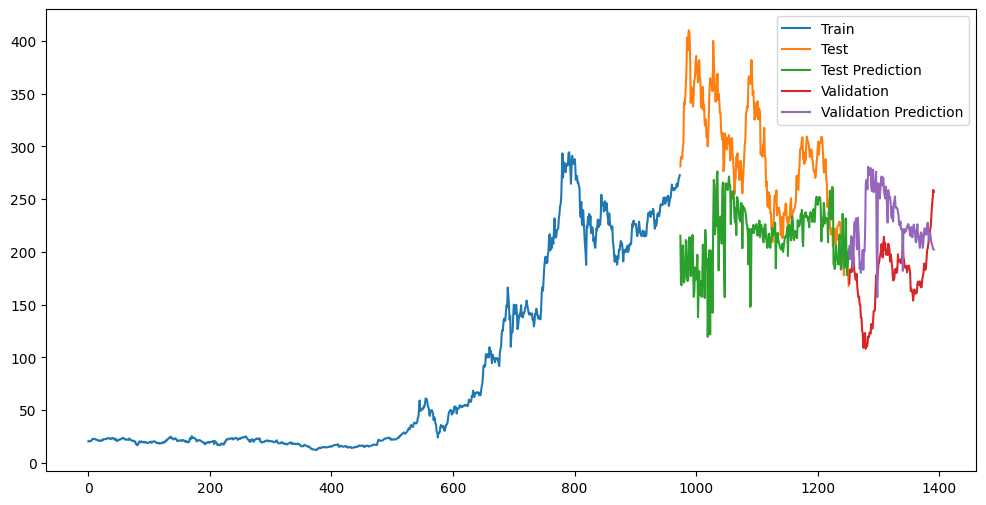

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(y_train, label='Train')

plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)),  test_pred, label='Test Prediction')

plt.plot(range(len(y_train) + len(y_test), len(y_train) + len(y_test) + len(y_val)), y_val, label='Validation')
plt.plot(range(len(y_train) + len(y_test), len(y_train) + len(y_test) + len(y_val)), val_pred, label='Validation Prediction')


#plt.plot(range(len(y_train) + len(y_test) + len(y_val), len(y_train) + len(y_test) + len(y_val) + 30), future_mean.reshape(-1, 1), label='30days_Next')

plt.legend()
plt.show()

In [ ]:

# plt.figure(figsize=(12,6))

# plt.plot(df['Date'][:train_size], y_train, label='Train')

# plt.plot(df['Date'][train_size:train_size+test_size], y_test, label='Test')
# plt.plot(df['Date'][train_size:train_size+test_size], test_pred, label='Test predict')

# plt.plot(df['Date'][train_size+test_size:], y_val, label='Validation')
# plt.plot(df['Date'][train_size+test_size:], val_pred, label='Validation predict')

# plt.plot(df_pred['Date'], pred_future, label='30 next days')

# plt.legend()
# plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_neighbors': [1,3,5,7,9,11]
}

model = KNeighborsRegressor()


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'n_neighbors': 3}


In [ ]:
best_model = grid_search.best_estimator_

test_pred = best_model.predict(X_test)
mae_test, rmse_test, mape_test = mae_rmse_mape(y_test, test_pred)

val_pred = best_model.predict(X_val)
mae_val, rmse_val, mape_val = mae_rmse_mape(y_val, val_pred)

print('MAE of Test: ', mae_test)
print('RMSE of Test: ', rmse_test)
print('MAPE of Test: ', mape_test)
print('------------------------')
print('MAE of Validation: ', mae_val)
print('RMSE of Validation: ', rmse_val)
print('MAPE of Validation: ', mape_val)

MAE of Test:  70.31101918465228
RMSE of Test:  90.80985617155046
MAPE of Test:  0.22165041340037178
------------------------
MAE of Validation:  59.11242857142857
RMSE of Validation:  70.52149887665125
MAPE of Validation:  0.37997969371496704


In [ ]:
pred_future = predict_FeatureDate(best_model, data)
pred_future

array([202.31333333, 199.81      , 201.97333333, 203.66666667,
       207.56666667, 202.82333333, 210.42      , 217.79      ,
       215.87333333, 217.37666667, 216.51666667, 218.26      ,
       221.63333333, 227.68666667, 227.52      , 220.08      ,
       217.99333333, 217.94333333, 224.41      , 219.25      ,
       222.59      , 212.15      , 217.15333333, 224.83333333,
       219.67      , 222.60333333, 230.72333333, 223.07      ,
       219.17      , 211.48333333])

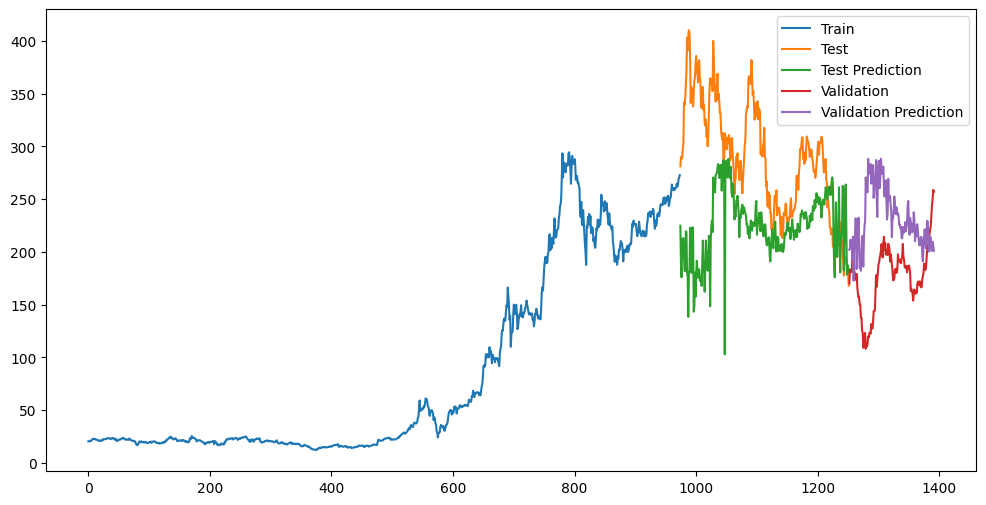

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(y_train, label='Train')

plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)),  test_pred, label='Test Prediction')

plt.plot(range(len(y_train) + len(y_test), len(y_train) + len(y_test) + len(y_val)), y_val, label='Validation')
plt.plot(range(len(y_train) + len(y_test), len(y_train) + len(y_test) + len(y_val)), val_pred, label='Validation Prediction')


#plt.plot(range(len(y_train) + len(y_test) + len(y_val), len(y_train) + len(y_test) + len(y_val) + 30), future_mean.reshape(-1, 1), label='30days_Next')

plt.legend()
plt.show()